# Flight Price Prediction - Atharva Rodge

# Introduction
In the new technological era, air travel has become an essential aspect of our lives, whether say for business, leisure, or visiting loved ones, or gonig back to our home countries for visit we all are excited to travel in a airplane. However, we observe that with the fluctuating nature of flight prices planning a trip can often be hard because of the uncertainity in the prices of the airline companies

By using historical flight data and predictive modeling techniques, my project provides travelers with insights into future flight prices, allowing them to plan their trips more efficiently and budget effectively.

To address this issue and help travellers make easier decisions. Our goal is to create a strong machine learning model that can effectively estimate flight rates based on a variety of criteria such as airline, departure and arrival locations, booking time, and other important information.

Through this project, i hope to contribute to enhancing and optimize the overall travel experience by offering a reliable tool for predicting flight prices, thereby enabling travelers to make well-informed decisions and optimize their travel expenses.

This dataset provides flight fare data gathered from the KAYAK website via web scraping techniques. The data was collected with the intention of providing users with information that would allow them to make educated decisions about when to buy airline tickets. By analysing historical airline costs, users may find the optimal times to purchase tickets and potentially save money.

## Goal 

The goal of this project is to predict future flight prices using historical data. In order to accomplish this we started off with analyzing a dataset that contains previous flight prices from 'New York City', 'Paris', 'Russia', 'Riyadh Saudi Arabia' to build a accurate prediction model.

Initially, The goal is to clean the dataset to select relevant features and performed encoding as we cannot use string values for the algoritms. We will prepare the data and manipluate it as per our requirment for the model and visualisation. Furthermore, we will select the best model and plot the actual and predicted values for that model and use some basic debugging techniques to check the accuracy of the model.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Dataset

The dataset for this project is has a collection of flight-related data acquired from KAYAK for specific routes listed below, this includs name of airline, Total stops, Source, Destination, Duration, Date and the main variable on which we are going to work the price of the flight booking. The collection covers a significant time period, including 4 months of flight data from various routes and carriers.

Additionally, data preprocessing techniques have been applied to clean and prepare the dataset for analysis, including handling missing values, removing duplicates, and encoding categorical variables, extracting import data from columns and deleteing additional columns. The dataset serves as the foundation for training and evaluating our flight price prediction model, providing valuable insights into the factors influencing airfare dynamics and enabling the development of accurate predictive algorithms.

Orignally the data is sourced from GIT HUB, ther are multiple datasets and referencesavailable on this platform. GitHub provides a centralised platform for developers to collaborate, manage, and exchange code, promoting transparency, efficiency, and creativity in software development projects.

In total the data have 8 main features Airline, Source, Destination, Total stops, date, Time, Price 

The data is scraped from Kayak for the period from 2022-02-01 to 2022-04-30 for the following 12 routes

RUH => NYC, RUH => SVO, RUH => PAR, NYC => RUH, NYC => SVO, NYC => PAR, SVO => PAR, SVO => RUH, SVO => NYC, PAR => NYC,       PAR => RUH, PAR => SVO.

This data was used to train the models of the project.

In [2]:
# The code snippet is to read the data using pandas library.
data1 = pd.read_csv('Data_set/NYC_SVO.csv')
data2 = pd.read_csv('Data_set/NYC_RUH.csv')
data3 = pd.read_csv('Data_set/NYC_PAR.csv')

data4 = pd.read_csv('Data_set/PAR_NYC.csv')
data5 = pd.read_csv('Data_set/PAR_SVO.csv')
data6 = pd.read_csv('Data_set/PAR_RUH.csv')

data7 = pd.read_csv("Data_set/SVO_NYC.csv")
data8 = pd.read_csv("Data_set/SVO_RUH.csv")
data9 = pd.read_csv("Data_set/SVO_PAR.csv")

data10 = pd.read_csv('Data_set/RUH_NYC.csv')
data11 = pd.read_csv("Data_set/RUH_PAR.csv")
data12 = pd.read_csv("Data_set/RUH_SVO.csv")

In [3]:
# Concatinating all the small dataset into single data for further analysis using concat() function in pandas
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12])

In [4]:
# Printing first 5 values in the dataset
data.head()

,Airline,Source,Destination,Duration,Total stops,Price,Date
0,Aeroflot,NYC,SVO,9h 00m,nonstop,"1,282 SAR",2022-02-01
1,Aeroflot,NYC,SVO,9h 00m,nonstop,"1,203 SAR",2022-02-01
2,Aeroflot,NYC,SVO,9h 00m,nonstop,"1,203 SAR",2022-02-01
3,Delta,NYC,SVO,11h 30m,1 stop,"1,397 SAR",2022-02-01
4,Delta,NYC,SVO,12h 35m,1 stop,"1,414 SAR",2022-02-01


In [5]:
data.shape

(55363, 7)

The shape() function is used to extract number of rows and columns in a dataframe. Using shape function we can see that the data contains '55363' unique rows and '7' columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55363 entries, 0 to 2724
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      55363 non-null  object
 1   Source       55363 non-null  object
 2   Destination  55363 non-null  object
 3   Duration     55363 non-null  object
 4   Total stops  55363 non-null  object
 5   Price        55363 non-null  object
 6   Date         55363 non-null  object
dtypes: object(7)
memory usage: 3.4+ MB


The data.info() function is used for summary of the Data Frame, including the data types of columns, the number of non-null values in each column, and memory usage. it also helped us0 to identify missing values, and assess memory usage. 

# PRELIMINARY ANALYSIS

During the preliminary analysis stage of the project, we began by exploring the dataset to obtain an understanding of its structure, contents, and features. First we checked the null value  We also examined the distribution of data across several variables to better understand the data. Followed by further data analysis to change the variable 'Price' from SAR to US.Dollar using regex. Aditionally, we create a final data converting the date into three different columns 'Month', 'Day', 'Year' and splitting duration into two different columns 'Hours' and 'Minutes'. We will used this clean dataframe for modelling. 

Furthermore, we used data visualisation tools such as Bar, box plots, and scatter plots to visualise the correlations between variables and identify any underlying patterns or trends. This early study revealed vital insights into the dataset's composition, which guided our following data preparation activities and influenced the creation of our flight price prediction model.

In [7]:
# Checking Null values
data.isna().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total stops    0
Price          0
Date           0
dtype: int64

From the above output we can see that the data is clean as there are no null values in this particular data.

In [8]:
def price(price):
    price = price.str.replace(',','', regex = True)
    price = price.str.replace('SAR',' ',regex = True)
    price = price.str.strip()
    price = round(pd.to_numeric(price) * 0.27 , 2 )
    return price

data['Price'] = price(data['Price']) 
data.head()

,Airline,Source,Destination,Duration,Total stops,Price,Date
0,Aeroflot,NYC,SVO,9h 00m,nonstop,346.14,2022-02-01
1,Aeroflot,NYC,SVO,9h 00m,nonstop,324.81,2022-02-01
2,Aeroflot,NYC,SVO,9h 00m,nonstop,324.81,2022-02-01
3,Delta,NYC,SVO,11h 30m,1 stop,377.19,2022-02-01
4,Delta,NYC,SVO,12h 35m,1 stop,381.78,2022-02-01


The function 'price' is defined to convert the price from SAR to US.Dollars 

In [9]:
# Replacing '-' with '/' to convert the column Date into three different Columns
data['Date'] = data['Date'].replace('-','/', regex = True)

In [10]:
# Creating three different columns using Data manipulation techniques
data['Date'] = pd.to_datetime( data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [11]:
# Drop the column date as we no more need it for further analysis because 
# we created three different columns using this particular column.
data.drop( columns = ['Date'] , inplace = True)

In [12]:
data.head()

,Airline,Source,Destination,Duration,Total stops,Price,Day,Month,Year
0,Aeroflot,NYC,SVO,9h 00m,nonstop,346.14,1,2,2022
1,Aeroflot,NYC,SVO,9h 00m,nonstop,324.81,1,2,2022
2,Aeroflot,NYC,SVO,9h 00m,nonstop,324.81,1,2,2022
3,Delta,NYC,SVO,11h 30m,1 stop,377.19,1,2,2022
4,Delta,NYC,SVO,12h 35m,1 stop,381.78,1,2,2022


In [13]:
# Function to split duration into hours and minutes
def split_duration(duration):
    parts = duration.split()
    hours = int(parts[0][:-1])
    minutes = int(parts[1][:-1])
    return hours, minutes

# Apply the function to the DataFrame
data[['Hours', 'Minutes']] = data['Duration'].apply(lambda x: pd.Series(split_duration(x)))

data.drop(columns = ['Duration'], axis = 1, inplace = True)

In [14]:
data.head()

,Airline,Source,Destination,Total stops,Price,Day,Month,Year,Hours,Minutes
0,Aeroflot,NYC,SVO,nonstop,346.14,1,2,2022,9,0
1,Aeroflot,NYC,SVO,nonstop,324.81,1,2,2022,9,0
2,Aeroflot,NYC,SVO,nonstop,324.81,1,2,2022,9,0
3,Delta,NYC,SVO,1 stop,377.19,1,2,2022,11,30
4,Delta,NYC,SVO,1 stop,381.78,1,2,2022,12,35


The data cleaning process was essential to ease our analysis by converting variables into standardized formats and simplifying the dataset. This involved transforming categorical variables into numerical representations. By removing extra information and enhancing data quality, we prepared the dataset for easier analysis and more accurate results.

# Method

This project developes predictive models and accurately estimating ticket prices by employing various regression methods and algorithms to address the flight price prediction challenge. The algorithms chosen were deemed suitable for the task and demonstrated effectiveness in capturing the complex relationships between the target variable - price, and input data.

Initially, Linear Regression algorithm is a baseline model to estimate price. This model assumes a linear relationship between input features and the target, aiming to minimize the mean squared error between observed and predicted prices. Our implementation of Multiple Regression and Lasso Regression achieved an accuracy score of 9% each on the test dataset.
These two regression models are the worst for the data and we can say that the regression cannot be usd to predict the price of the flight. Usually we use regression model for categorical data and in our case the data is not categorical.
Additionally, it has the highest MAE, MSE, and RMSE among the models, signifying larger errors in predicting flight prices. The low R2 value (0.0949) suggests that only about 9.49% of the variance in flight prices is explained by the model.

Furthermore, the Random Forest Regressor algorithm, and Descision Tree Regressor an ensemble learning technique that combines multiple decision trees to enhance predictive accuracy. Random Forests are skilled in managing complex datasets and non-linear relationships, making them ideal for our flight price forecasting project. the Random Forest Regressor model attained an accuracy score of '89 %' and Descision Tree model gave us the accuracy score of '86 %' on the test dataset, surpassing the Multiple Regression and Lasso Regressoin models. Moreover, the computed MSE, RMSE, and R2 metrics provided valuable insights into predictive performance.

In summary, we used different models and compared different approaches to find the best model for prediction airfare prices while also learning about the underlying dataset linkages and trends.

### Model Preperation

In [15]:
model_data = data.copy()

In [16]:
model_data.head()

,Airline,Source,Destination,Total stops,Price,Day,Month,Year,Hours,Minutes
0,Aeroflot,NYC,SVO,nonstop,346.14,1,2,2022,9,0
1,Aeroflot,NYC,SVO,nonstop,324.81,1,2,2022,9,0
2,Aeroflot,NYC,SVO,nonstop,324.81,1,2,2022,9,0
3,Delta,NYC,SVO,1 stop,377.19,1,2,2022,11,30
4,Delta,NYC,SVO,1 stop,381.78,1,2,2022,12,35


In [17]:
# To check the unique values in the variable Total Stops
model_data['Total stops'].unique()

array(['nonstop ', '1 stop ', '2 stops ', '3 stops '], dtype=object)

In [18]:
# Replacing the string values to numerical for our analysis
model_data['Total stops'] = model_data['Total stops'].replace({'1 stop ': 1 , '2 stops ': 2 , '3 stops ': 3 , 'nonstop ': 0})

In [19]:
# Importing label incoding ro convert the string values to unique values 
# as for prediction we acnnot use string values
from sklearn.preprocessing import LabelEncoder
col = ['Airline','Source', 'Destination']

for col in col:
    model_data[col] = LabelEncoder().fit_transform(model_data[col])

In [20]:
model_data.head()

,Airline,Source,Destination,Total stops,Price,Day,Month,Year,Hours,Minutes
0,14,0,3,0,346.14,1,2,2022,9,0
1,14,0,3,0,324.81,1,2,2022,9,0
2,14,0,3,0,324.81,1,2,2022,9,0
3,208,0,3,1,377.19,1,2,2022,11,30
4,208,0,3,1,381.78,1,2,2022,12,35


As we can see the above data frame has all the values as numerical values which we will use for modelling and use the data to split into training and testing data for further analysis

### Modelling

In [21]:
# x variable is our input variable
x = model_data.drop(['Price'], axis=1)

# y variable is our target variable
y = model_data['Price']

In [22]:
# Column name of input variable
x.columns

Index(['Airline', 'Source', 'Destination', 'Total stops', 'Day', 'Month',
       'Year', 'Hours', 'Minutes'],
      dtype='object')

In [23]:
# Target variable
y.head()

0    346.14
1    324.81
2    324.81
3    377.19
4    381.78
Name: Price, dtype: float64

In [24]:
# Splitting the data into train test data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y , test_size = 0.20 , random_state = 1)

This step is important for modelling because we split the data into train and test data. We are using 20% data as test data and 80% as train data of model prediction

In [25]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Airline  Source  Destination  Total stops  Day  Month  Year  Hours  \
4130      272       3            0            2   29      4  2022     17   
2172      267       3            1            1    1      4  2022      9   
6381      147       1            0            2   22      2  2022     17   
9301      147       1            0            1    2      3  2022     11   
1987      352       1            3            1    8      3  2022      5   
...       ...     ...          ...          ...  ...    ...   ...    ...   
5251      240       2            0            2   31      3  2022     21   
4783      306       1            2            1   25      3  2022     17   
82        208       0            1            1    1      2  2022     12   
1728      208       1            0            1    6      2  2022     14   
5275      171       1            2            1    9      4  2022     11   

      Minutes  
4130       35  
2172       10  
6381       15  
9301       40  
1987   

In [26]:
# creating a function to retunr the metrices
metrics_lst = []
    
def get_metrics(model):
    global metrics_lst  # Declare metrics_lst as global
    
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    mae = metrics.mean_absolute_error(y_test , model.predict(X_test))
    mse = metrics.mean_squared_error(y_test, model.predict(X_test))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, model.predict(X_test))
   
    temp_list = [train_score, test_score, mae, mse, rmse, r2]
    
    metrics_lst.extend([temp_list])  # Use extend instead of list comprehension

    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

The above function will return us the metrics such as 'Train Score', 'Test Score:'
'Mean Absolute Error', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)' this provided model evaluation metrics will 
help us to select the best model.

### Multiple Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

multiReg_model = LinearRegression()
multiReg_model.fit(X_train , y_train)
get_metrics(multiReg_model)

Train score: 9.933997543584972
Test score: 8.92457122691469
MAE: 783.6711418675537
MSE: 1452167.3592384243
RMSE: 1205.0590687756448
Coefficient of Determination: 0.0892457122691469


### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

Train score: 9.93341378416086
Test score: 8.928560163668664
MAE: 783.8584784611016
MSE: 1452103.7569712682
RMSE: 1205.0326787980764
Coefficient of Determination: 0.08928560163668664


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)
get_metrics(randomForest)

Train score: 97.67439072633522
Test score: 89.73302830227412
MAE: 102.40468435412318
MSE: 163703.44206458746
RMSE: 404.60282013919215
Coefficient of Determination: 0.8973302830227412


#### Using manual debugging to check our prediction

In [30]:
model_data.iloc[500]

Airline         718.00
Source            0.00
Destination       3.00
Total stops       2.00
Price          3229.74
Day              25.00
Month             2.00
Year           2022.00
Hours            20.00
Minutes          46.00
Name: 500, dtype: float64

Inserting the input variable values into a list and predict price to check our prediction value.

In [31]:
randomForest.predict([[718, 0, 3, 2, 25,2,2022,20,46]])

C:\Users\Atharva\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3241.809])

As we can see in the above output the predicted price for unique values of input variables which we extracted the predicted price is 3237.435 very close to actual price 3229.74 so the result is accurate.

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

Descision_Tree_Reg = DecisionTreeRegressor()
Descision_Tree_Reg.fit(X_train, y_train)
get_metrics(Descision_Tree_Reg)

Train score: 98.73655186774727
Test score: 86.28513034163768
MAE: 91.41243296435378
MSE: 218679.02597202893
RMSE: 467.6312927638921
Coefficient of Determination: 0.8628513034163768


#### Using manual debugging to check our prediction

In [33]:
model_data.iloc[10]

Airline         269.00
Source            0.00
Destination       3.00
Total stops       1.00
Price           484.92
Day               1.00
Month             2.00
Year           2022.00
Hours            15.00
Minutes          15.00
Name: 10, dtype: float64

Inserting the input variable values into a list and predict price to check our prediction value.

In [34]:
randomForest.predict([[269, 0,3,1,1,2,2022,15,15]])

C:\Users\Atharva\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([511.0074])

As we can see in the above output, the projected price for unique values of input variables that we extracted is 499.9131, which is extremely close to the real price of 484, indicating that the result is correct.

### Model comparision

In [35]:
# Creating a table considering all the important matrices to compare the model to select the best model
columns = ['Train Score', 'Test Score','Mean Absolute Error','Mean Squared Error','RMSE','R2']

df = pd.DataFrame(metrics_lst,columns = columns)
df['Train_Score'] = df['Train Score']
df['Test Score'] = df['Test Score'] 

new_col_model = ['Multiple Regression' , 'Lasso Regression' ,  'Random Forest' , 'Descision Tree'  ]
df.insert(loc=0, column='Model', value=new_col_model)

df.head()

,Model,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,RMSE,R2,Train_Score
0,Multiple Regression,9.933998,8.924571,783.671142,1.452167e+06,1205.059069,0.089246,9.933998
1,Lasso Regression,9.933414,8.928560,783.858478,1.452104e+06,1205.032679,0.089286,9.933414
2,Random Forest,97.674391,89.733028,102.404684,1.637034e+05,404.602820,0.897330,97.674391
3,Descision Tree,98.736552,86.285130,91.412433,2.186790e+05,467.631293,0.862851,98.736552


## Best Model Selection

from the above table and provided models, the best model appears to be the Random Forest, while the worst model is the Multiple Regression and Lasso regression.

In brief the Random Forest is the Best Model because the Random Forest model achieved the highest test score of 89.71%, indicating its ability to generalize well to unseen data.
R-squared It also has the highest R2 value of 0.897, suggesting that approximately 89.7% of the variance in the target variable is explained by the model. Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These metrics are significantly lower compared to other models, indicating smaller prediction errors and better overall performance.

Multiple Regression is the worst model for predicting the price of airline fare Multiple Linear Regression is a simple and interpretable model, its limitations in handling complex relationships can result in poor predictive performance, especially in datasets with nonlinear and intricate patterns. Test Score: The Multiple Regression model has the lowest test score of 8.92%, indicating poor performance in predicting flight prices on unseen data.
R-squared (R2): It also has the lowest R2 value of 0.089, indicating that only around 8.9% of the variance in the target variable is explained by the model.
Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE): These metrics are considerably higher compared to other models, indicating larger prediction errors and poorer performance overall.

## Result-  Random Forest is the best model with accuracy of 89.95 %

##### Random forest performs the best giving us the accuracy of 89.95 % for Test data and 97.63 % for Train data. The R squared value of the model Random Forest model is 0.899 highest among all other models.  a higher R2 value suggests that the independent variable(s) are more effective at explaining the variability in the dependent variable, while a lower R2 value indicates that the independent variable(s) are less effective at explaining the variability.  Mean Absolute Error (MAE): 101.86 , Mean Squared Error (MSE): 1.603204e+05 , and Root Mean Squared Error (RMSE): 400.400311 these  values are relatively low compared to other model values. When these metrics values are significantly lower compared to other models, it indicates that the model's predictions are closer to the actual values on average, suggesting better overall performance in terms of prediction accuracy. Lower values of MAE, MSE, and RMSE imply smaller prediction errors, which means that the model is making more accurate predictions compared to other models being evaluated. So we come to a conclusion that the Random Forest is the best model.

# Data Visualisation

In [36]:
data.head()

,Airline,Source,Destination,Total stops,Price,Day,Month,Year,Hours,Minutes
0,Aeroflot,NYC,SVO,nonstop,346.14,1,2,2022,9,0
1,Aeroflot,NYC,SVO,nonstop,324.81,1,2,2022,9,0
2,Aeroflot,NYC,SVO,nonstop,324.81,1,2,2022,9,0
3,Delta,NYC,SVO,1 stop,377.19,1,2,2022,11,30
4,Delta,NYC,SVO,1 stop,381.78,1,2,2022,12,35


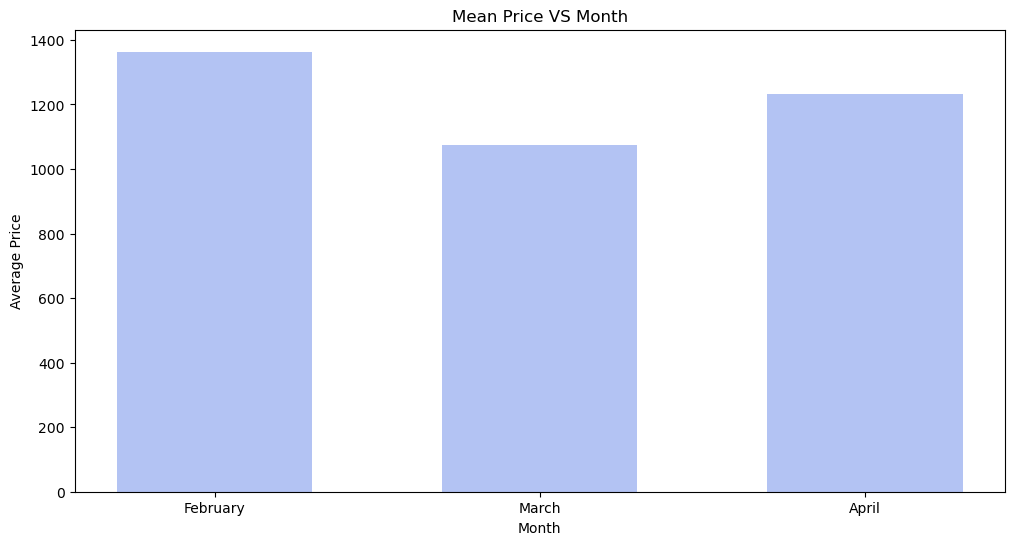

In [37]:
month_price = data.groupby(['Month'])['Price'].mean().reset_index()
month_price.drop(columns = ['Month'], inplace = True)

new_col_model = ['February' , 'March' ,  'April']
month_price.insert(loc=0, column='Month', value = new_col_model)
month_price

plt.figure(figsize = (12,6))
plt.bar( month_price['Month'] , month_price['Price'], color = 'royalBlue', width = 0.6, alpha = 0.4)
plt.title('Mean Price VS Month')
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()

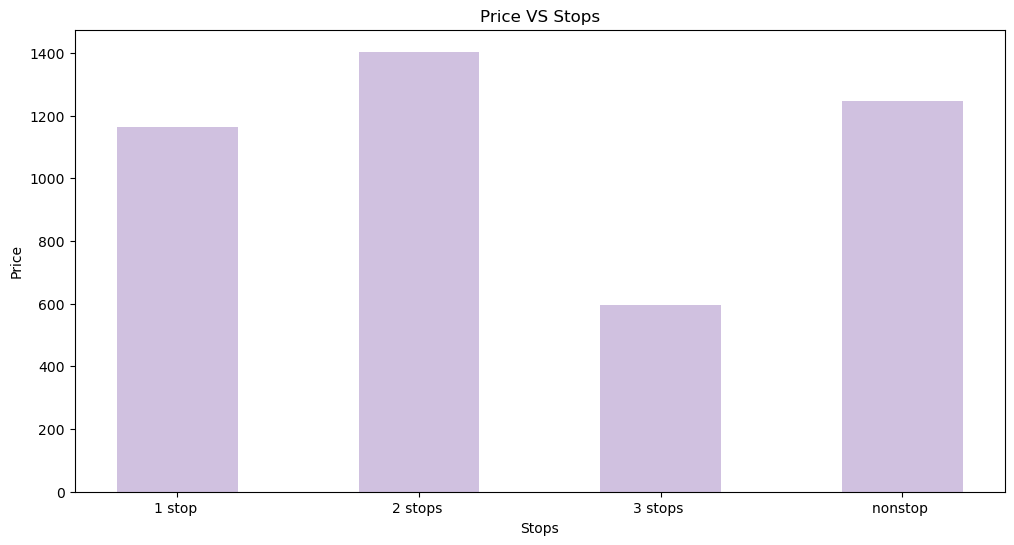

In [38]:
stop_price = data.groupby(['Total stops'])['Price'].mean().reset_index()

plt.figure(figsize = (12,6))
plt.bar( stop_price['Total stops'] , stop_price['Price'] , color = 'RebeccaPurple' , width = 0.5 , alpha = 0.3)
plt.title('Price VS Stops')
plt.xlabel('Stops')
plt.ylabel("Price")
plt.show()

## Total count of flight from Source

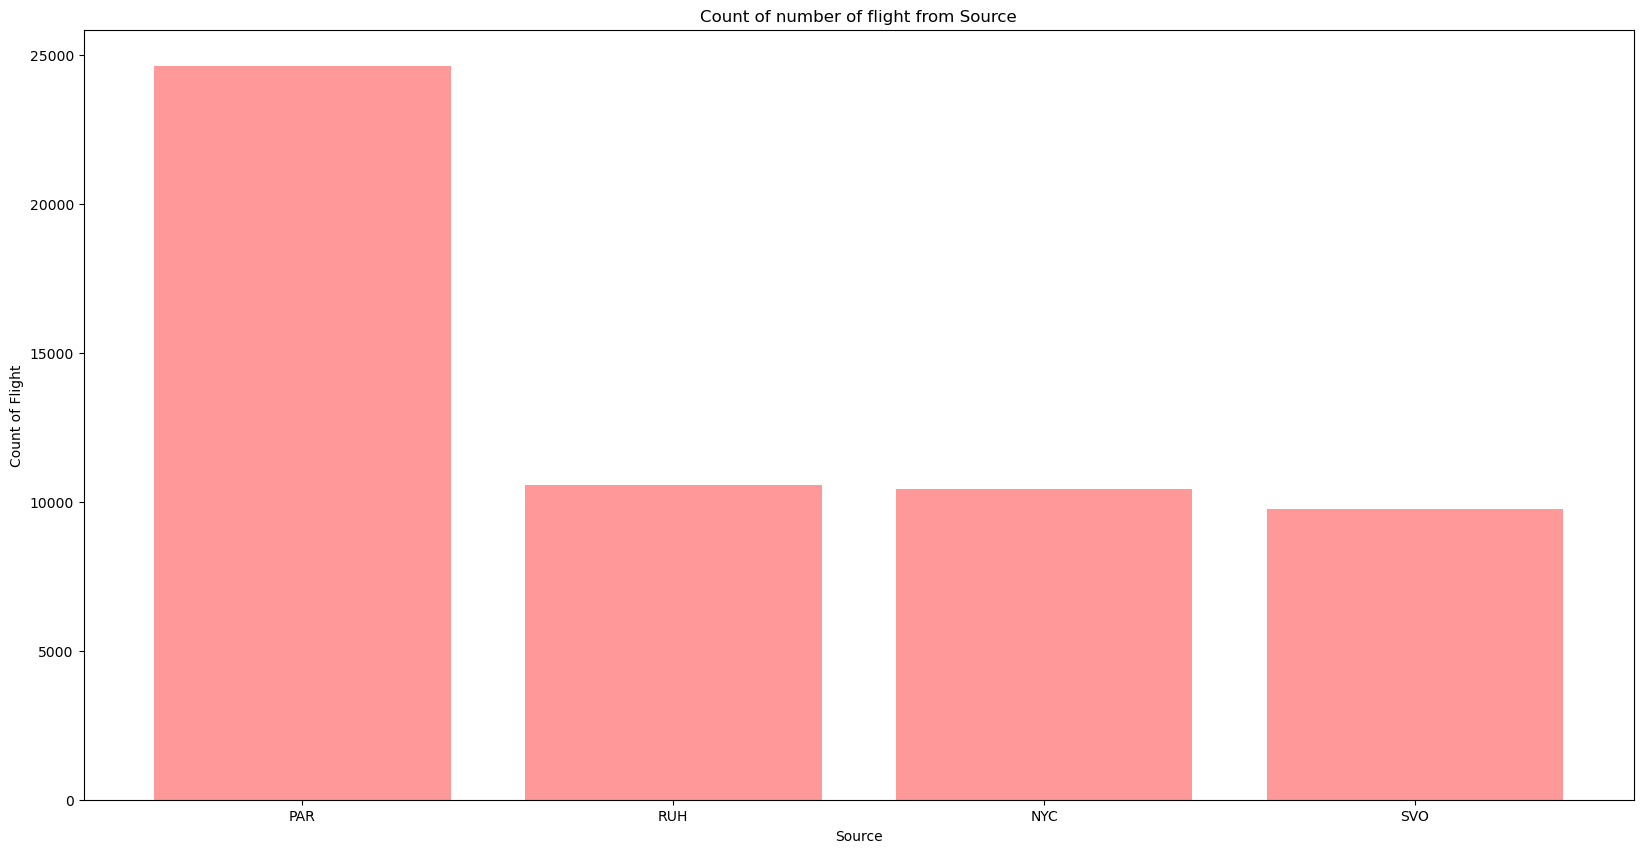

In [39]:
no_of_flights_each_route = data['Source'].value_counts()

plt.figure(figsize = (20,10))
plt.bar( no_of_flights_each_route.index , no_of_flights_each_route.values , color = 'red', alpha = 0.4)
plt.title('Count of number of flight from Source')
plt.xlabel('Source')
plt.ylabel('Count of Flight')
plt.show()

## Total count of flight to destination

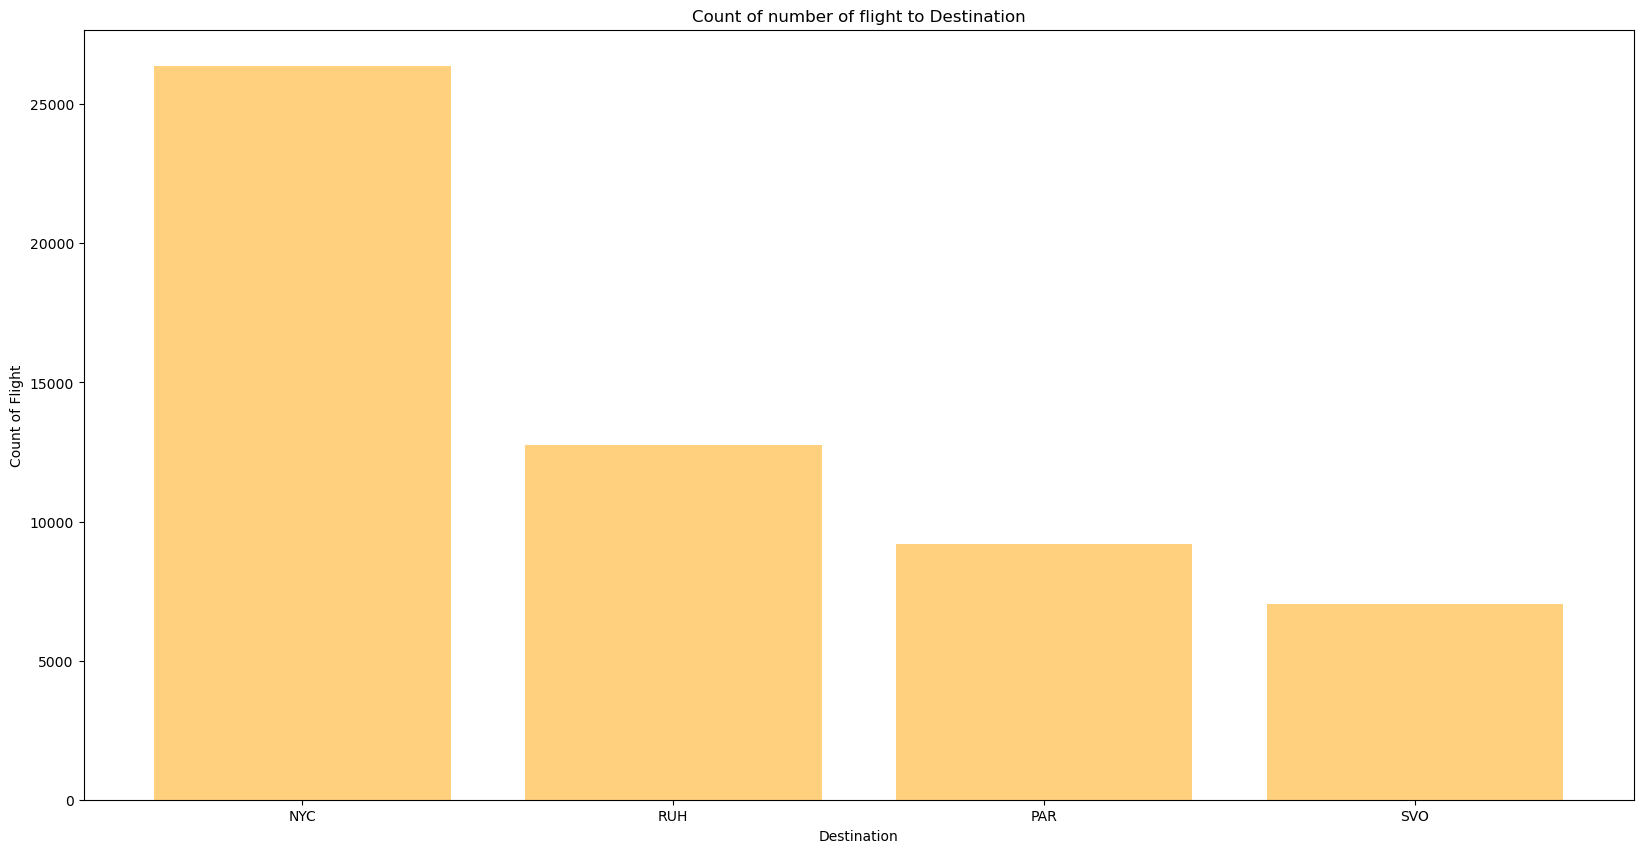

In [40]:
no_of_flights_each_route = data['Destination'].value_counts()

plt.figure(figsize = (20,10))
plt.bar( no_of_flights_each_route.index , no_of_flights_each_route.values , color = 'orange', alpha = 0.5)
plt.title('Count of number of flight to Destination')
plt.xlabel('Destination')
plt.ylabel("Count of Flight")
plt.show()

## Route vs Mean price

In [41]:
comparision = data.groupby(by=['Source' , 'Destination'])['Price'].mean().reset_index()
table_route = pd.DataFrame()
table_route['Route'] = comparision['Source'] + '->' + comparision['Destination']
table_route['Price'] = comparision['Price']
table_route.head(15)

,Route,Price
0,NYC->PAR,544.298031
1,NYC->RUH,1474.502602
2,NYC->SVO,1172.438929
3,PAR->NYC,1965.360337
4,PAR->RUH,855.259805
5,PAR->SVO,382.272697
6,RUH->NYC,1189.855318
7,RUH->PAR,616.664864
8,RUH->SVO,939.966903
9,SVO->NYC,1567.076466


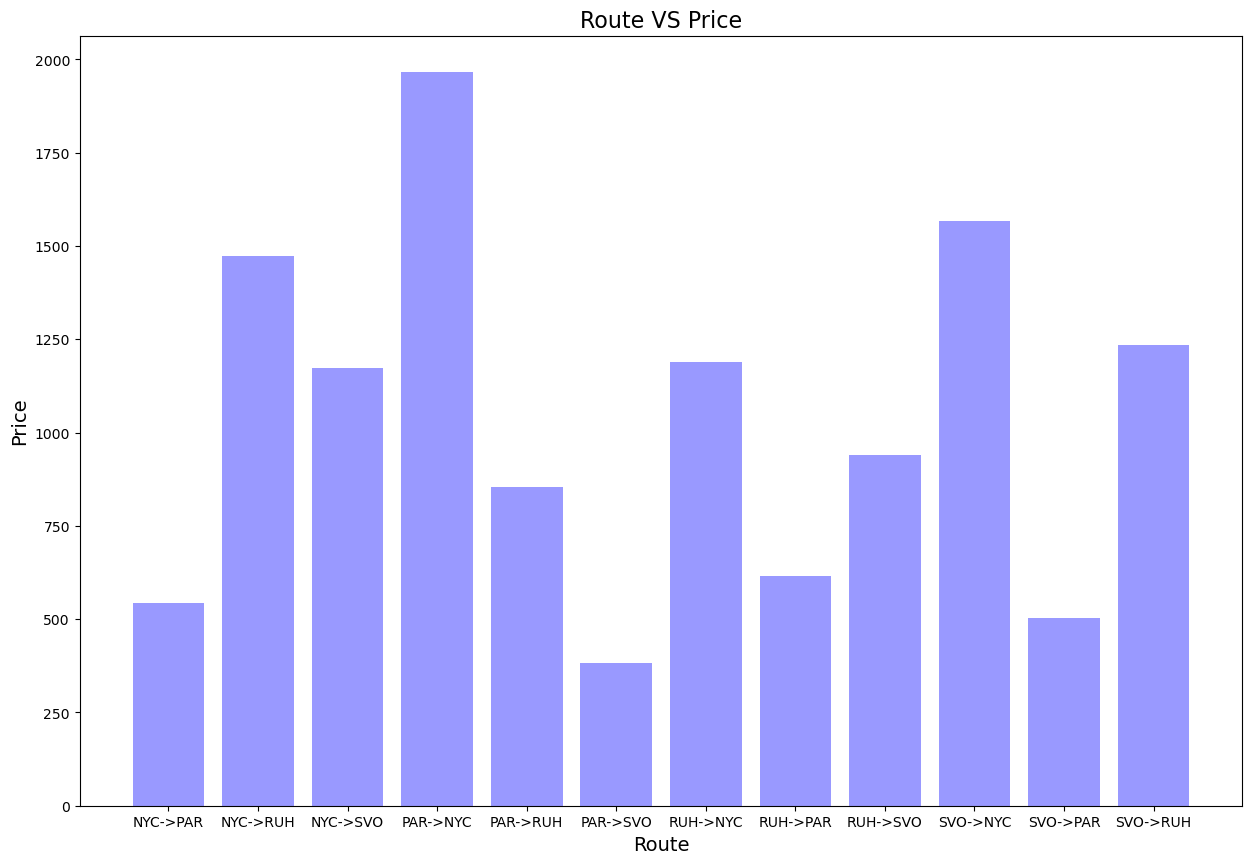

In [42]:
# grouped_data = comp_table.groupby(['Source' , 'Destination'])['Price'].mean().reset_index()

# # Plotting
plt.figure(figsize=(15, 10))
plt.bar(table_route['Route'] , table_route['Price'], color = 'blue', alpha = 0.4)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Route VS Price', fontsize=16)
plt.show()

### Counts of flight on each Route

In [43]:
temp_data = pd.DataFrame()
temp_data['Route'] = data['Source'] + '->' + data['Destination']
temp_data = temp_data.groupby('Route').value_counts()

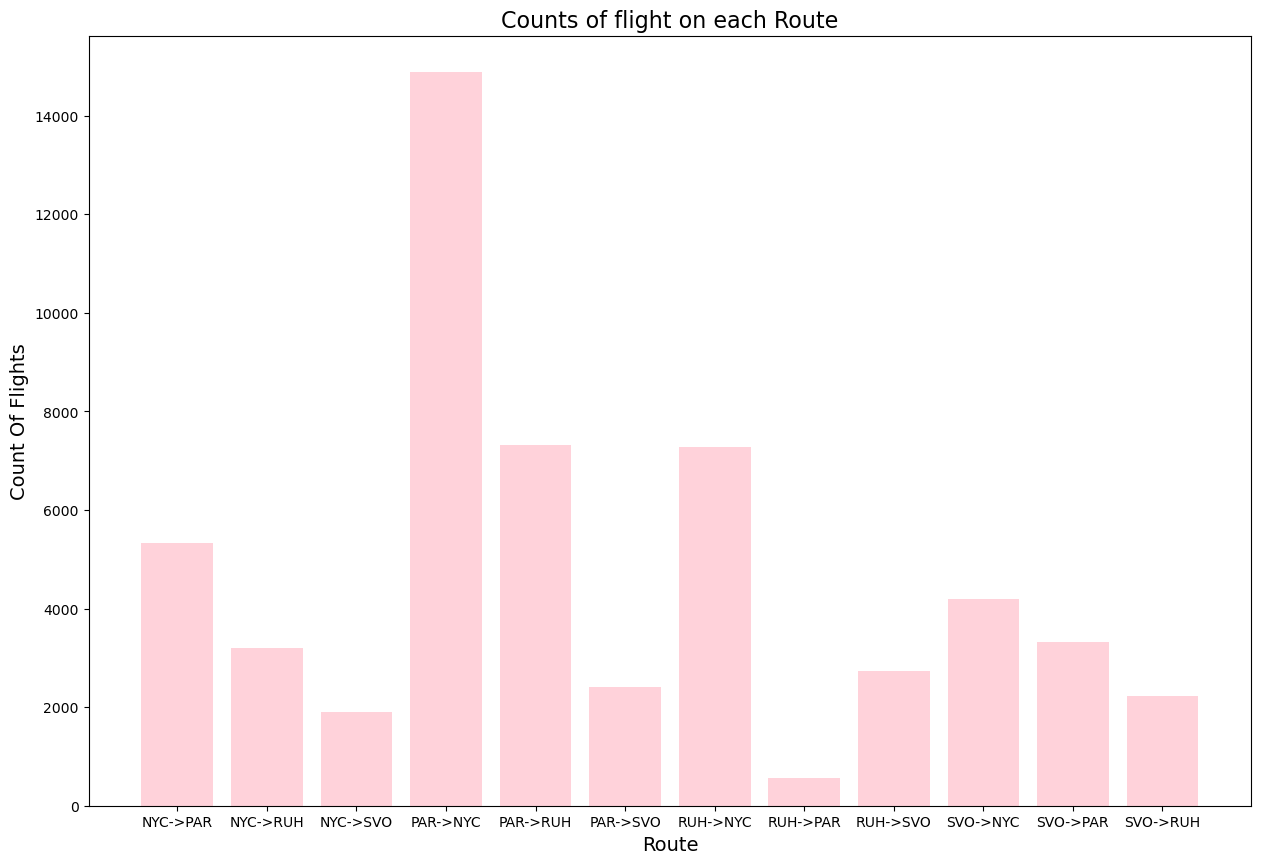

In [44]:
plt.figure(figsize = (15,10))
plt.bar( temp_data.index , temp_data.values , color = 'pink', alpha = 0.7)
plt.title('Counts of flight on each Route', fontsize=16)
plt.xlabel("Route" , fontsize=14)
plt.ylabel("Count Of Flights" , fontsize=14)
plt.show()

### Box plot of top 10 Airline by Flight Count

In [45]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total stops', 'Price', 'Day',
       'Month', 'Year', 'Hours', 'Minutes'],
      dtype='object')

In [46]:
df = data['Airline'].value_counts()
df = df.head(10)
df.reset_index()

,index,Airline
0,Delta,4486
1,KLM,3165
2,American Airlines,3150
3,Lufthansa,2691
4,Multiple Airlines,2657
5,Air France,2360
6,Air Canada,2201
7,United Airlines,1917
8,British Airways,1756
9,Qatar Airways,1464


In [47]:
top_airline_by_count = []
for i in df.index:
    top_airline_by_count.append(i)

In [48]:
top_airline = pd.DataFrame()
filtered_rows = []

# Iterate over the rows of the DataFrame
for index, row in data.iterrows():
    if row['Airline'] in top_airline_by_count:
        
        # If the airline is in the list of top airlines, append the row to filtered_rows
        filtered_rows.append({'Airline': row['Airline'], 'Price': row['Price']})

# Create a DataFrame from the filtered rows
top_airline = pd.DataFrame(filtered_rows)


In [49]:
top_airline['Airline'].unique()

array(['Delta', 'KLM', 'Air France', 'Multiple Airlines', 'Qatar Airways',
       'Lufthansa', 'British Airways', 'Air Canada', 'American Airlines',
       'United Airlines'], dtype=object)

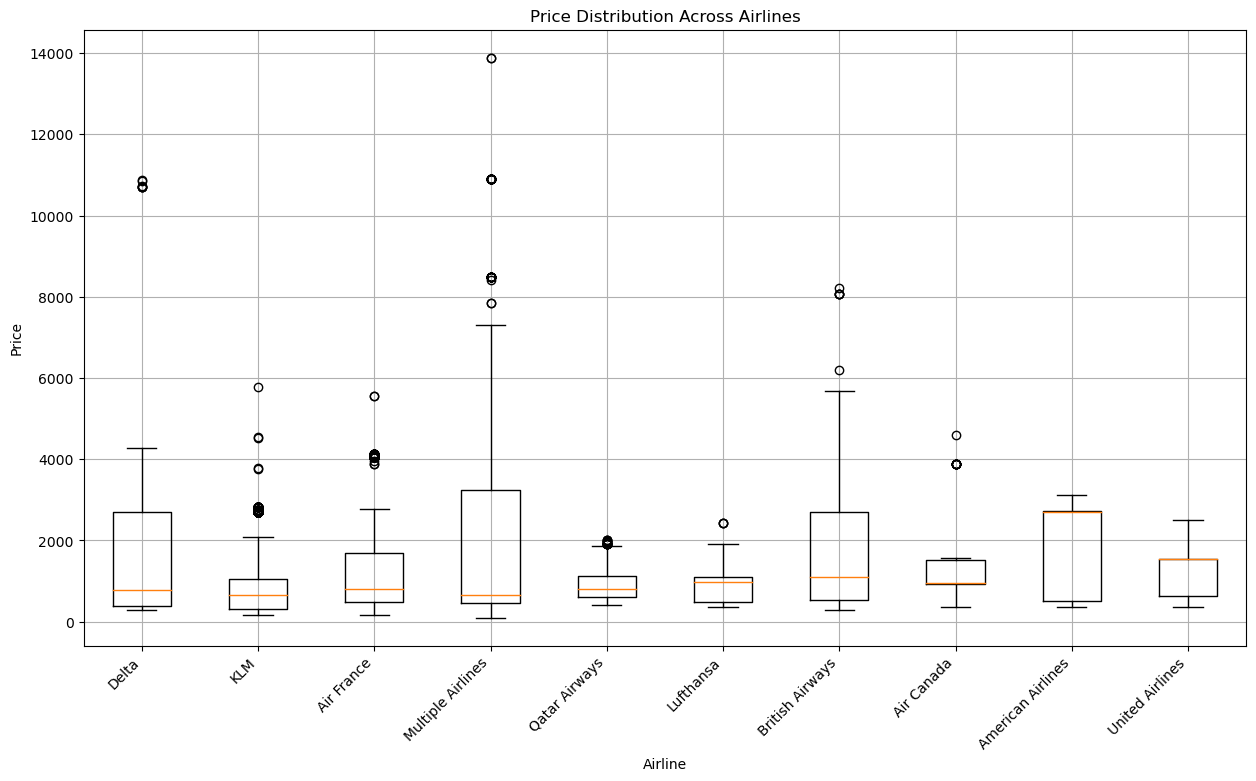

In [50]:
plt.figure(figsize=(15, 8))
plt.boxplot([top_airline[top_airline['Airline'] == airline]['Price'] for airline in top_airline['Airline'].unique()], labels = top_airline['Airline'].unique())
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.grid(True)
plt.show()

 # Model Preperation

In [51]:
data.head()

,Airline,Source,Destination,Total stops,Price,Day,Month,Year,Hours,Minutes
0,Aeroflot,NYC,SVO,nonstop,346.14,1,2,2022,9,0
1,Aeroflot,NYC,SVO,nonstop,324.81,1,2,2022,9,0
2,Aeroflot,NYC,SVO,nonstop,324.81,1,2,2022,9,0
3,Delta,NYC,SVO,1 stop,377.19,1,2,2022,11,30
4,Delta,NYC,SVO,1 stop,381.78,1,2,2022,12,35


In [52]:
data['Total stops'].unique()

array(['nonstop ', '1 stop ', '2 stops ', '3 stops '], dtype=object)

In [53]:
data['Total stops'] = data['Total stops'].replace({'1 stop ': 1 , '2 stops ': 2 , '3 stops ': 3 , 'nonstop ': 0})

In [54]:
data.head()

,Airline,Source,Destination,Total stops,Price,Day,Month,Year,Hours,Minutes
0,Aeroflot,NYC,SVO,0,346.14,1,2,2022,9,0
1,Aeroflot,NYC,SVO,0,324.81,1,2,2022,9,0
2,Aeroflot,NYC,SVO,0,324.81,1,2,2022,9,0
3,Delta,NYC,SVO,1,377.19,1,2,2022,11,30
4,Delta,NYC,SVO,1,381.78,1,2,2022,12,35


In [55]:
from sklearn.preprocessing import LabelEncoder

col = ['Airline','Source', 'Destination']

for col in col:
    data[col] = LabelEncoder().fit_transform(data[col])

In [56]:
data.head()

,Airline,Source,Destination,Total stops,Price,Day,Month,Year,Hours,Minutes
0,14,0,3,0,346.14,1,2,2022,9,0
1,14,0,3,0,324.81,1,2,2022,9,0
2,14,0,3,0,324.81,1,2,2022,9,0
3,208,0,3,1,377.19,1,2,2022,11,30
4,208,0,3,1,381.78,1,2,2022,12,35


# Modelling

In [57]:
x = data.drop(['Price'], axis=1)
y = data['Price']

In [58]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total stops', 'Day', 'Month',
       'Year', 'Hours', 'Minutes'],
      dtype='object')

In [59]:
y.head()

0    346.14
1    324.81
2    324.81
3    377.19
4    381.78
Name: Price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y , test_size = 0.25 , random_state = 1)

In [61]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Airline  Source  Destination  Total stops  Day  Month  Year  Hours  \
1077       716       0            1            1   17      3  2022     17   
1961       419       1            2            1   20      2  2022     10   
1437       267       1            0            1    5      2  2022     17   
14749      208       1            0            1   30      4  2022     14   
219        253       2            1            1   25      3  2022     10   
...        ...     ...          ...          ...  ...    ...   ...    ...   
5251       240       2            0            2   31      3  2022     21   
4783       306       1            2            1   25      3  2022     17   
82         208       0            1            1    1      2  2022     12   
1728       208       1            0            1    6      2  2022     14   
5275       171       1            2            1    9      4  2022     11   

       Minutes  
1077        37  
1961        35  
1437        25  
14749  

In [62]:
metrics_lst = []
    
def get_metrics(model):
    global metrics_lst  # Declare metrics_lst as global
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    mae = metrics.mean_absolute_error(y_test , model.predict(X_test))
    mse = metrics.mean_squared_error(y_test, model.predict(X_test))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, model.predict(X_test))
   
    temp_list = [train_score, test_score, mae, mse, rmse, r2]
    
    metrics_lst.extend([temp_list])  # Use extend instead of list comprehension

    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

## Multiple Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression


multiReg_model = LinearRegression()
multiReg_model.fit(X_train , y_train)
get_metrics(multiReg_model)

Train score: 0.0981373775299973
Test score: 0.09485361970753381
MAE: 781.1706535917311
MSE: 1431023.331099267
RMSE: 1196.253874016409
Coefficient of Determination: 0.09485361970753381


## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

Descision_Tree_Reg = DecisionTreeRegressor()

Descision_Tree_Reg.fit(X_train, y_train)

get_metrics(Descision_Tree_Reg)

Train score: 0.9876871838926687
Test score: 0.8713818119827741
MAE: 89.02226848803278
MSE: 203343.49433833163
RMSE: 450.9362419880793
Coefficient of Determination: 0.8713818119827741


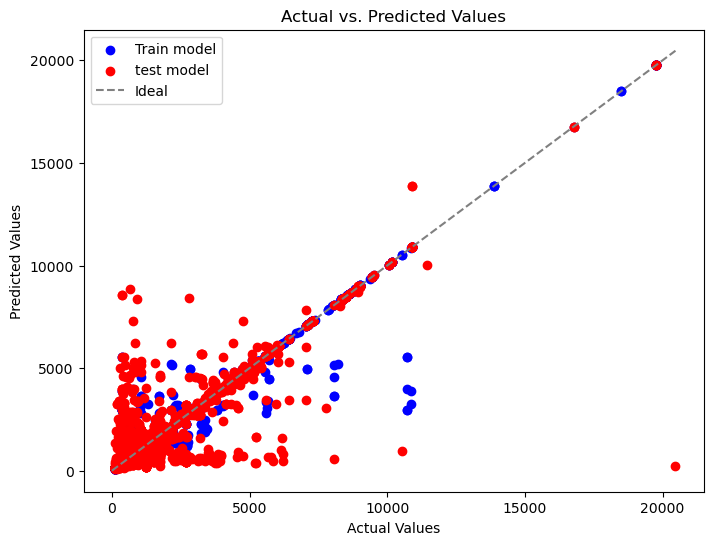

In [65]:
# Assuming y_test contains the actual target values and y_pred contains the predicted values for two different models
y_pred_train = Descision_Tree_Reg.predict(X_train)
y_pred_test = Descision_Tree_Reg.predict(X_test)
plt.figure(figsize=(8, 6))

# Scatter plot for the first model (blue color)
plt.scatter(y_train, y_pred_train, color='blue', label='Train model')

# Scatter plot for the second model (red color)
plt.scatter(y_test, y_pred_test, color='red', label='test model')

# # Plotting the diagonal line for reference
max_val = max(max(y_train), max(y_test))
plt.plot([0, max_val], [0, max_val], color='gray', linestyle='--', label='Ideal')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()  # Show legend with labels
plt.show()

In [66]:
data.iloc[1500]

Airline         267.0
Source            0.0
Destination       3.0
Total stops       2.0
Price           872.1
Day               6.0
Month             3.0
Year           2022.0
Hours            15.0
Minutes          25.0
Name: 1500, dtype: float64

In [67]:
randomForest.predict([[267, 0,3,2,6,3,2022,15,25]])

C:\Users\Atharva\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([886.8312])

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)
get_metrics(randomForest)

Train score: 0.9759416212457173
Test score: 0.893161283618852
MAE: 102.45645652158855
MSE: 168910.4647987649
RMSE: 410.9871832536447
Coefficient of Determination: 0.893161283618852


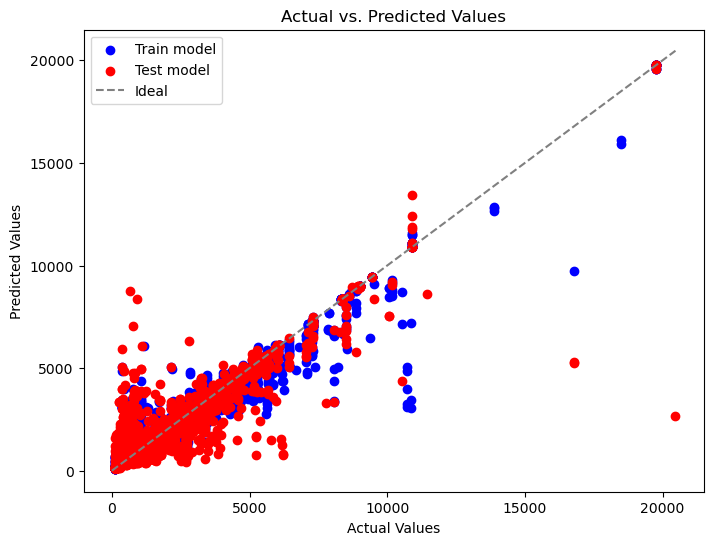

In [69]:
# Assuming y_test contains the actual target values and y_pred contains the predicted values for two different models
y_pred_train = randomForest.predict(X_train)
y_pred_test = randomForest.predict(X_test)

plt.figure(figsize=(8, 6))

# Scatter plot for the first model (blue color)
plt.scatter(y_train, y_pred_train, color='blue', label='Train model')

# Scatter plot for the second model (red color)
plt.scatter(y_test, y_pred_test, color='red', label='Test model')

# # Plotting the diagonal line for reference
max_val = max(max(y_train), max(y_test))
plt.plot([0, max_val], [0, max_val], color='gray', linestyle='--', label='Ideal')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()  # Show legend with labels
plt.show()

In [70]:
data.iloc[10]

Airline         269.00
Source            0.00
Destination       3.00
Total stops       1.00
Price           484.92
Day               1.00
Month             2.00
Year           2022.00
Hours            15.00
Minutes          15.00
Name: 10, dtype: float64

In [71]:
randomForest.predict([[269, 0,3,1,1,2,2022,15,15]])

C:\Users\Atharva\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([497.4426])

## Lasso

In [72]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

Train score: 0.09813155812522645
Test score: 0.09489792205096548
MAE: 781.3645559715808
MSE: 1430953.2897352914
RMSE: 1196.2245983657465
Coefficient of Determination: 0.09489792205096548


## Model Comparisoin

In [73]:
columns = ['Train_Score', 'Test Score','Mean Absolute Error','Mean Squared Error','RMSE','R2']

df = pd.DataFrame(metrics_lst,columns = columns)
df['Train_Score'] = df['Train_Score'] * 100
df['Test Score'] = df['Test Score'] * 100

new_col_model = ['Multiple Regression' , 'Descision Tree' , 'Random Forest' , 'Lasso Regression']
df.insert(loc=0, column='Model', value=new_col_model)

df.head()

,Model,Train_Score,Test Score,Mean Absolute Error,Mean Squared Error,RMSE,R2
0,Multiple Regression,9.813738,9.485362,781.170654,1.431023e+06,1196.253874,0.094854
1,Descision Tree,98.768718,87.138181,89.022268,2.033435e+05,450.936242,0.871382
2,Random Forest,97.594162,89.316128,102.456457,1.689105e+05,410.987183,0.893161
3,Lasso Regression,9.813156,9.489792,781.364556,1.430953e+06,1196.224598,0.094898


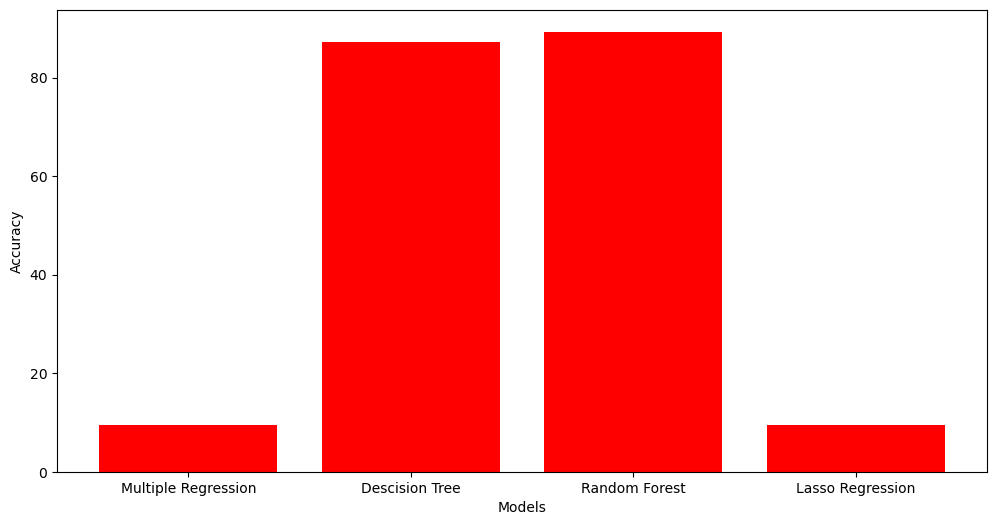

In [74]:
plt.figure(figsize = (12,6))
plt.bar( df['Model'] , df['Test Score'] , color = 'red')
plt.title('')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

## Conclusion


Random Forest is known for its ability to handle complex relationships and high-dimensional data effectively. It combines multiple decision trees to reduce overfitting and improve predictive accuracy, which is reflected in its high test score and R2 value.
On the other hand, Multiple Regression assumes linear relationships between variables, which may not adequately capture the complexities present in the dataset, leading to poorer performance and higher prediction errors.
In summary, the Random Forest model outperforms the Multiple Regression model due to its ability to capture nonlinear relationships and handle complex datasets more effectively, resulting in better predictive performance.